# Exploratory Analysis of Airbnb and ACS Data on Housing, Nashville, TN

This notebook is designed to explore assets related to data from InsideAirbnb and the U.S. American Community Census Datasets for Nashville, Tennessee.
The primary goal of this analysis is to determine factors related to rental supply as it relates to Airbnb. 

## Table of Contents

<ol> 
    <li>Chapter 1 - Exploring Decennial Census Occupancy Status  
    <li>Chapter 2 - Exploring Decennial Census Racial Characteristics
    <li>Chapter 3 - Airbnb Listings pt. 2 - Join to Master Block Shapefile

In [1]:
# import libraries
import geopandas as gpd 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# read in files 
listings = gpd.read_file("../shp/listings_reprojected.shp");
blocks = gpd.read_file("../shp/blocks_individual.shp")
decennial_occupancy = pd.read_csv("../tables/nashville_census/decennial_occupancy/DECENNIALPL2020.H1_data_with_overlays_2021-12-15T142048.csv")
decennial_race = pd.read_csv("../tables/nashville_census/decennial_race/DECENNIALPL2020.P1_data_with_overlays_2022-02-11T032215.csv")
blocks_airbnbs = gpd.read_file('../shp/nashville_airbnb_pointinpolygon.shp')
#calendar = gpd.read_file("./nashville_airbnb/calendar.csv")

C:\Users\Nate\AppData\Local\Temp\ipykernel_22016\772815580.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  decennial_race = pd.read_csv("../tables/nashville_census/decennial_race/DECENNIALPL2020.P1_data_with_overlays_2022-02-11T032215.csv")


In [3]:
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [4]:
# First, let's set max columns display for geopandas
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows', 100)

# Adding the plt parameters for charting size 
plt.rcParams['figure.figsize'] = (9, 9)

<AxesSubplot:>

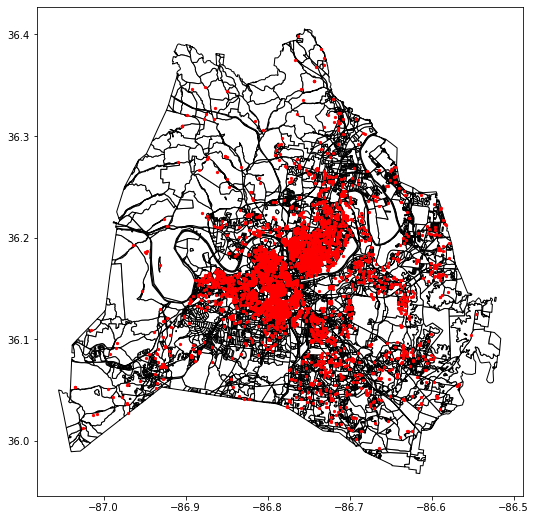

In [5]:
fig, ax = plt.subplots()

blocks.plot(ax=ax, color='white', edgecolor='black');
listings.plot(ax=ax, marker='o', color='red', markersize=5)

Above is a quick map of all Airbnb listings in Davidson County, TN. The high density is primarily on the North and South banks of the Cumberland River. 

# Chapter 1: Decennial Census Data - Housing Occupancy 

In this chapter, I'll explore the 2020 Decennial Census' H1 table concerning occupancy status by block groups in Nashville. The purpose of this section is to understand what the occupancy characteristics are and begin to understand which block groups are heavily occupied and which ones are vacant. Additionally, at the end of this chapter, I'll join this table to the Tiger/Line shapefile of census block groups so that I can begin to consolidate the datasets into useable shapefiles. 

In [6]:
blocks.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47,037,010303,2006,470370103032006,Block 2006,G5040,R,None,None,S,0,80613,+36.3199276,-086.6896963,"POLYGON ((-86.69930 36.32772, -86.69902 36.327..."
1,47,037,010401,3013,470370104013013,Block 3013,G5040,R,None,None,S,0,160819,+36.3013523,-086.6697888,"POLYGON ((-86.69285 36.28628, -86.69270 36.286..."
2,47,037,013702,1000,470370137021000,Block 1000,G5040,R,None,None,S,0,114875,+36.1924143,-086.7837045,"POLYGON ((-86.79462 36.20064, -86.79457 36.200..."
3,47,037,010103,1001,470370101031001,Block 1001,G5040,R,None,None,S,1593567,12453,+36.3840321,-086.9037656,"POLYGON ((-86.91421 36.38354, -86.91292 36.383..."
4,47,037,010401,1000,470370104011000,Block 1000,G5040,R,None,None,S,0,49703,+36.2832306,-086.6872169,"POLYGON ((-86.68772 36.28480, -86.68770 36.285..."


In [7]:
decennial_occupancy.head(500)

,GEO_ID,NAME,H1_001N,H1_002N,H1_003N
0,id,Geographic Area Name,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant
1,1000000US470370101031000,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7
2,1000000US470370101031001,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0
3,1000000US470370101031002,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6
4,1000000US470370101031003,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11
...,...,...,...,...,...
495,1000000US470370104032002,"Block 2002, Block Group 2, Census Tract 104.03...",288,281,7
496,1000000US470370104032003,"Block 2003, Block Group 2, Census Tract 104.03...",0,0,0
497,1000000US470370104032004,"Block 2004, Block Group 2, Census Tract 104.03...",31,31,0
498,1000000US470370104032005,"Block 2005, Block Group 2, Census Tract 104.03...",161,154,7


In [8]:
# remove the first row from the table
decennial_occupancy = decennial_occupancy.iloc[1: , :]

In [9]:
# check data types of decennial data
decennial_occupancy.dtypes

GEO_ID     object
NAME       object
H1_001N    object
H1_002N    object
H1_003N    object
dtype: object

In [10]:
# convert the total, occupied, and vacancy fields to integer types
decennial_occupancy['H1_001N'] = pd.to_numeric(decennial_occupancy['H1_001N']);
decennial_occupancy['H1_002N'] = pd.to_numeric(decennial_occupancy['H1_002N']);
decennial_occupancy['H1_003N'] = pd.to_numeric(decennial_occupancy['H1_003N']);
                                      

In [11]:
decennial_occupancy.dtypes

GEO_ID     object
NAME       object
H1_001N     int64
H1_002N     int64
H1_003N     int64
dtype: object

In [12]:
decennial_occupancy.head()

,GEO_ID,NAME,H1_001N,H1_002N,H1_003N
1,1000000US470370101031000,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7
2,1000000US470370101031001,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0
3,1000000US470370101031002,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6
4,1000000US470370101031003,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11
5,1000000US470370101031004,"Block 1004, Block Group 1, Census Tract 101.03...",96,94,2


In [13]:
# rename 'GEO_ID' column to GEOID for a join later on 
decennial_occupancy.rename(columns={'GEO_ID':'GEOID', 'H1_001N': 'total_units', 'H1_002N': 'total_occupied', 'H1_003N': 'total_vacant'}, inplace=True)

In [14]:
# slice off the first 9 characters of the decennial data GEOID field values
decennial_occupancy['GEOID'] = decennial_occupancy['GEOID'].str[9:]

In [15]:
decennial_occupancy.head()

,GEOID,NAME,total_units,total_occupied,total_vacant
1,470370101031000,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7
2,470370101031001,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0
3,470370101031002,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6
4,470370101031003,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11
5,470370101031004,"Block 1004, Block Group 1, Census Tract 101.03...",96,94,2


In [16]:
# create percentage fields for percent of the block group that is occupied and percent of the block group that is vacant
decennial_occupancy['percent_occupied'] = (decennial_occupancy["total_occupied"] / decennial_occupancy["total_units"]) * 100;
decennial_occupancy['percent_vacant'] = (decennial_occupancy["total_vacant"] / decennial_occupancy["total_units"]) * 100;


In [17]:
decennial_occupancy.head()

,GEOID,NAME,total_units,total_occupied,total_vacant,percent_occupied,percent_vacant
1,470370101031000,"Block 1000, Block Group 1, Census Tract 101.03...",9,2,7,22.222222,77.777778
2,470370101031001,"Block 1001, Block Group 1, Census Tract 101.03...",36,36,0,100.000000,0.000000
3,470370101031002,"Block 1002, Block Group 1, Census Tract 101.03...",35,29,6,82.857143,17.142857
4,470370101031003,"Block 1003, Block Group 1, Census Tract 101.03...",76,65,11,85.526316,14.473684
5,470370101031004,"Block 1004, Block Group 1, Census Tract 101.03...",96,94,2,97.916667,2.083333


## Attribute Join: Occupancy Status Table to Tiger/Line Block Group Shapefile

Below, we'll join the decennial occupancy status table to the tiger/line block group shapefile

In [18]:
#let's take a look at the blocks table
blocks.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47,037,010303,2006,470370103032006,Block 2006,G5040,R,None,None,S,0,80613,+36.3199276,-086.6896963,"POLYGON ((-86.69930 36.32772, -86.69902 36.327..."
1,47,037,010401,3013,470370104013013,Block 3013,G5040,R,None,None,S,0,160819,+36.3013523,-086.6697888,"POLYGON ((-86.69285 36.28628, -86.69270 36.286..."
2,47,037,013702,1000,470370137021000,Block 1000,G5040,R,None,None,S,0,114875,+36.1924143,-086.7837045,"POLYGON ((-86.79462 36.20064, -86.79457 36.200..."
3,47,037,010103,1001,470370101031001,Block 1001,G5040,R,None,None,S,1593567,12453,+36.3840321,-086.9037656,"POLYGON ((-86.91421 36.38354, -86.91292 36.383..."
4,47,037,010401,1000,470370104011000,Block 1000,G5040,R,None,None,S,0,49703,+36.2832306,-086.6872169,"POLYGON ((-86.68772 36.28480, -86.68770 36.285..."


In [19]:
# rename the geoid 
blocks.rename(columns={'GEOID20':'GEOID'}, inplace=True)

In [20]:
# check data type of blocks
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [21]:
blocks.dtypes

STATEFP20       object
COUNTYFP20      object
TRACTCE20       object
BLOCKCE20       object
GEOID           object
NAME20          object
MTFCC20         object
UR20            object
UACE20          object
UATYPE20        object
FUNCSTAT20      object
ALAND20          int64
AWATER20         int64
INTPTLAT20      object
INTPTLON20      object
geometry      geometry
dtype: object

In [22]:
# join the decennial table into our blocks shapefile
blocks= blocks.merge(decennial_occupancy, on="GEOID")

In [23]:
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [24]:
blocks.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NAME,total_units,total_occupied,total_vacant,percent_occupied,percent_vacant
0,47,037,010303,2006,470370103032006,Block 2006,G5040,R,None,None,S,0,80613,+36.3199276,-086.6896963,"POLYGON ((-86.69930 36.32772, -86.69902 36.327...","Block 2006, Block Group 2, Census Tract 103.03...",4,2,2,50.0,50.0
1,47,037,010401,3013,470370104013013,Block 3013,G5040,R,None,None,S,0,160819,+36.3013523,-086.6697888,"POLYGON ((-86.69285 36.28628, -86.69270 36.286...","Block 3013, Block Group 3, Census Tract 104.01...",0,0,0,NaN,NaN
2,47,037,013702,1000,470370137021000,Block 1000,G5040,R,None,None,S,0,114875,+36.1924143,-086.7837045,"POLYGON ((-86.79462 36.20064, -86.79457 36.200...","Block 1000, Block Group 1, Census Tract 137.02...",0,0,0,NaN,NaN
3,47,037,010103,1001,470370101031001,Block 1001,G5040,R,None,None,S,1593567,12453,+36.3840321,-086.9037656,"POLYGON ((-86.91421 36.38354, -86.91292 36.383...","Block 1001, Block Group 1, Census Tract 101.03...",36,36,0,100.0,0.0
4,47,037,010401,1000,470370104011000,Block 1000,G5040,R,None,None,S,0,49703,+36.2832306,-086.6872169,"POLYGON ((-86.68772 36.28480, -86.68770 36.285...","Block 1000, Block Group 1, Census Tract 104.01...",0,0,0,NaN,NaN


In [25]:
blocks.to_file('blocks_joined.shp')

C:\Users\Nate\anaconda3\envs\airbnb\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Nate\AppData\Local\Temp\ipykernel_22016\1575662573.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  blocks.to_file('blocks_joined.shp')


# Chapter 2: Exploring Decennial Census Racial Characteristics

In [26]:
decennial_race.head()

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_009N,P1_010N,P1_011N,P1_012N,P1_013N,P1_014N,P1_015N,P1_016N,P1_017N,P1_018N,P1_019N,P1_020N,P1_021N,P1_022N,P1_023N,P1_024N,P1_025N,P1_026N,P1_027N,P1_028N,P1_029N,P1_030N,P1_031N,P1_032N,P1_033N,P1_034N,P1_035N,P1_036N,P1_037N,P1_038N,P1_039N,P1_040N,P1_041N,P1_042N,P1_043N,P1_044N,P1_045N,P1_046N,P1_047N,P1_048N,P1_049N,P1_050N,P1_051N,P1_052N,P1_053N,P1_054N,P1_055N,P1_056N,P1_057N,P1_058N,P1_059N,P1_060N,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two 

In [27]:
decennial_race.rename(columns={"P1_001N": "Total_r", "P1_003N":"White Alone", "P1_004N":"Black Alone", "P1_006N":"Asian Alone"}, inplace=True)

In [28]:
decennial_race.head()

,GEO_ID,NAME,Total_r,P1_002N,White Alone,Black Alone,P1_005N,Asian Alone,P1_007N,P1_008N,P1_009N,P1_010N,P1_011N,P1_012N,P1_013N,P1_014N,P1_015N,P1_016N,P1_017N,P1_018N,P1_019N,P1_020N,P1_021N,P1_022N,P1_023N,P1_024N,P1_025N,P1_026N,P1_027N,P1_028N,P1_029N,P1_030N,P1_031N,P1_032N,P1_033N,P1_034N,P1_035N,P1_036N,P1_037N,P1_038N,P1_039N,P1_040N,P1_041N,P1_042N,P1_043N,P1_044N,P1_045N,P1_046N,P1_047N,P1_048N,P1_049N,P1_050N,P1_051N,P1_052N,P1_053N,P1_054N,P1_055N,P1_056N,P1_057N,P1_058N,P1_059N,P1_060N,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Popula

In [29]:
# variable to store only 
decennial_list = ['GEO_ID','Total_r', 'White Alone', 'Black Alone']

In [30]:
decennial_race = decennial_race[decennial_list]

In [31]:
decennial_race.head()

,GEO_ID,Total_r,White Alone,Black Alone
0,id,!!Total:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...
1,1000000US470370101031000,16,10,1
2,1000000US470370101031001,85,77,1
3,1000000US470370101031002,99,87,1
4,1000000US470370101031003,182,172,3


In [32]:
type(decennial_race)

pandas.core.frame.DataFrame

In [33]:
# what are the dtypes?
decennial_race.dtypes

GEO_ID         object
Total_r        object
White Alone    object
Black Alone    object
dtype: object

In [34]:
# remove the first row from the table
decennial_race = decennial_race.iloc[1: , :]

In [35]:
# convert the total, white alone, and black alone fields to integer types
decennial_race['Total_r'] = pd.to_numeric(decennial_race['Total_r']);
decennial_race['White Alone'] = pd.to_numeric(decennial_race['White Alone']);
decennial_race['Black Alone'] = pd.to_numeric(decennial_race['Black Alone']);

In [36]:
#check to confirm dtypes
decennial_race.dtypes

GEO_ID         object
Total_r         int64
White Alone     int64
Black Alone     int64
dtype: object

In [37]:
# slice off the first 9 characters of the decennial data GEOID field values
decennial_race['GEO_ID'] = decennial_race['GEO_ID'].str[9:]

In [38]:
decennial_race.head()

,GEO_ID,Total_r,White Alone,Black Alone
1,470370101031000,16,10,1
2,470370101031001,85,77,1
3,470370101031002,99,87,1
4,470370101031003,182,172,3
5,470370101031004,228,212,4


In [39]:
decennial_race.rename(columns={"GEO_ID":"GEOID"}, inplace=True)

In [40]:
decennial_race.head()

,GEOID,Total_r,White Alone,Black Alone
1,470370101031000,16,10,1
2,470370101031001,85,77,1
3,470370101031002,99,87,1
4,470370101031003,182,172,3
5,470370101031004,228,212,4


In [41]:
# create percentage fields for percent of the block group that is white alone and percent of the block group that is black alone
decennial_race['percent_white_alone'] = (decennial_race["White Alone"] / decennial_race["Total_r"]) * 100;
decennial_race['percent_black_alone'] = (decennial_race["Black Alone"] / decennial_race["Total_r"]) * 100;

In [42]:
# join the blocks/occupancy table from earlier to this new table
# join the decennial table into our blocks shapefile
blocks= blocks.merge(decennial_race, on="GEOID")

In [43]:
blocks.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NAME,total_units,total_occupied,total_vacant,percent_occupied,percent_vacant,Total_r,White Alone,Black Alone,percent_white_alone,percent_black_alone
0,47,037,010303,2006,470370103032006,Block 2006,G5040,R,None,None,S,0,80613,+36.3199276,-086.6896963,"POLYGON ((-86.69930 36.32772, -86.69902 36.327...","Block 2006, Block Group 2, Census Tract 103.03...",4,2,2,50.0,50.0,14,7,5,50.000000,35.714286
1,47,037,010401,3013,470370104013013,Block 3013,G5040,R,None,None,S,0,160819,+36.3013523,-086.6697888,"POLYGON ((-86.69285 36.28628, -86.69270 36.286...","Block 3013, Block Group 3, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
2,47,037,013702,1000,470370137021000,Block 1000,G5040,R,None,None,S,0,114875,+36.1924143,-086.7837045,"POLYGON ((-86.79462 36.20064, -86.79457 36.200...","Block 1000, Block Group 1, Census Tract 137.02...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
3,47,037,010103,1001,470370101031001,Block 1001,G5040,R,None,None,S,1593567,12453,+36.3840321,-086.9037656,"POLYGON ((-86.91421 36.38354, -86.91292 36.383...","Block 1001, Block Group 1, Census Tract 101.03...",36,36,0,100.0,0.0,85,77,1,90.588235,1.176471
4,47,037,010401,1000,470370104011000,Block 1000,G5040,R,None,None,S,0,49703,+36.2832306,-086.6872169,"POLYGON ((-86.68772 36.28480, -86.68770 36.285...","Block 1000, Block Group 1, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN


In [44]:
blocks.total_units.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        4
1        0
2        0
3       36
4        0
        ..
9092     0
9093    35
9094    23
9095     9
9096    11
Name: total_units, Length: 9097, dtype: int64>

In [45]:
blocks.plot

## Chapter 4 - Airbnb Listings Pt. 2 - Join to the Master Blocks Table

In [46]:
listings.head()

,id,name,host_id,host_name,neighbourh,neighbou_1,latitude,longitude,room_type,price,minimum_ni,number_of_,last_revie,reviews_pe,calculated,availabili,number_o_1,license,geometry
0,6422,Nashville Charm,12172,Michele,None,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-03,4.38,1,199,0,None,POINT (-86.73581 36.17315)
1,39870,Close to Vanderbilt 2,171184,Evelyn,None,District 18,36.12523,-86.81278,Private room,60,1,267,2021-12-04,4.17,1,233,5,None,POINT (-86.81278 36.12523)
2,72906,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard Carson,None,District 18,36.13122,-86.80066,Entire home/apt,81,2,607,2021-12-12,4.74,1,30,5,None,POINT (-86.80066 36.13122)
3,258817,ButterflyRoom-private bath- open in oct,22296,Diana,None,District 12,36.16249,-86.58988,Private room,36,30,96,2019-12-14,0.79,7,354,0,None,POINT (-86.58988 36.16249)
4,289242,"MorningstarHouse, monthly room- open sept",22296,Diana,None,District 12,36.16102,-86.59207,Private room,34,30,76,2019-01-12,0.63,7,354,0,None,POINT (-86.59207 36.16102)


In [47]:
listings_columns = ["id", "name", "host_id", "host_name", "neighbou_1", "latitude", "longitude", "room_type", "price", "minimum_ni", "geometry"]

In [48]:
listings = listings[listings_columns]

In [49]:
type(listings)

geopandas.geodataframe.GeoDataFrame

In [50]:
listings.head()

,id,name,host_id,host_name,neighbou_1,latitude,longitude,room_type,price,minimum_ni,geometry
0,6422,Nashville Charm,12172,Michele,District 6,36.17315,-86.73581,Private room,40,30,POINT (-86.73581 36.17315)
1,39870,Close to Vanderbilt 2,171184,Evelyn,District 18,36.12523,-86.81278,Private room,60,1,POINT (-86.81278 36.12523)
2,72906,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard Carson,District 18,36.13122,-86.80066,Entire home/apt,81,2,POINT (-86.80066 36.13122)
3,258817,ButterflyRoom-private bath- open in oct,22296,Diana,District 12,36.16249,-86.58988,Private room,36,30,POINT (-86.58988 36.16249)
4,289242,"MorningstarHouse, monthly room- open sept",22296,Diana,District 12,36.16102,-86.59207,Private room,34,30,POINT (-86.59207 36.16102)


In [51]:
listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [52]:
# keep only airbnbs that aare entire homes/apts in the room_type column
def filter_units(df, col, values):
    return df[~df[col].isin(values)]


In [53]:
listings = filter_units(listings, "room_type", ["Private room", "Shared room", "Hotel room" ])

In [54]:
listings.count

<bound method DataFrame.count of             id                                               name    host_id  \
2        72906  Vandy/Belmont/10 mins to Broadway - Sunny 800 ...     176117   
6       329997  A+ Cottage & private courtyard! 5 mins to Down...    1684051   
9       421290    Private Entry Studio Suite/King/Wetbar/DT 5 min    1684051   
10      431258    5 MIN TO DT! 2 Bdrm, 2.5 Baths Hot tub & Patio!    1684051   
12      632636  Admire the Skyline from the Rooftop Terrace at...    1684051   
...        ...                                                ...        ...   
6355  53848373                   TWO LUXURY TOWNHOMES - SLEEPS 24   20772148   
6356  53849579  NYE Buffett Style! Margaritaville Studio Sleeps 4  372514865   
6357  53850709  Good as Gold Rowhouse - Minutes to downtown, V...   26211861   
6358  53855857    New Year's Eve!! Margaritaville Studio Sleeps 4  372514865   
6359  53859326  Nashville Famous - Luxurious Townhome with Swe...   85360355   

      

In [55]:
listings.to_file('../shp/listings_cleaned.shp')

C:\Users\Nate\anaconda3\envs\airbnb\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [56]:
blocks_airbnbs.head()

,BLOCKCE20,GEOID20,NAME20,airbnbs,geometry
0,2006,470370103032006,Block 2006,0.0,"POLYGON ((-86.69930 36.32772, -86.69902 36.327..."
1,3013,470370104013013,Block 3013,0.0,"POLYGON ((-86.69285 36.28628, -86.69270 36.286..."
2,1000,470370137021000,Block 1000,0.0,"POLYGON ((-86.79462 36.20064, -86.79457 36.200..."
3,1001,470370101031001,Block 1001,0.0,"POLYGON ((-86.91421 36.38354, -86.91292 36.383..."
4,1000,470370104011000,Block 1000,0.0,"POLYGON ((-86.68772 36.28480, -86.68770 36.285..."


In [57]:
blocks_airbnbs.rename(columns={"GEOID20": "GEOID"}, inplace=True)

In [58]:
blocks_airbnbs.drop(columns="geometry")

,BLOCKCE20,GEOID,NAME20,airbnbs
0,2006,470370103032006,Block 2006,0.0
1,3013,470370104013013,Block 3013,0.0
2,1000,470370137021000,Block 1000,0.0
3,1001,470370101031001,Block 1001,0.0
4,1000,470370104011000,Block 1000,0.0
...,...,...,...,...
9092,3000,470370117003000,Block 3000,0.0
9093,1005,470370156341005,Block 1005,0.0
9094,2000,470370105022000,Block 2000,0.0
9095,1013,470370132021013,Block 1013,0.0


In [59]:
type(blocks_airbnbs)

geopandas.geodataframe.GeoDataFrame

In [60]:
blocks.merge(blocks_airbnbs, on="GEOID")

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20_x,GEOID,NAME20_x,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry_x,NAME,total_units,total_occupied,total_vacant,percent_occupied,percent_vacant,Total_r,White Alone,Black Alone,percent_white_alone,percent_black_alone,BLOCKCE20_y,NAME20_y,airbnbs,geometry_y
0,47,037,010303,2006,470370103032006,Block 2006,G5040,R,None,None,S,0,80613,+36.3199276,-086.6896963,"POLYGON ((-86.69930 36.32772, -86.69902 36.327...","Block 2006, Block Group 2, Census Tract 103.03...",4,2,2,50.000000,50.000000,14,7,5,50.000000,35.714286,2006,Block 2006,0.0,"POLYGON ((-86.69930 36.32772, -86.69902 36.327..."
1,47,037,010401,3013,470370104013013,Block 3013,G5040,R,None,None,S,0,160819,+36.3013523,-086.6697888,"POLYGON ((-86.69285 36.28628, -86.69270 36.286...","Block 3013, Block Group 3, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN,3013,Block 3013,0.0,"POLYGON ((-86.69285 36.28628, -86.69270 36.286..."
2,47,037,013702,1000,470370137021000,Block 1000,G5040,R,None,None,S,0,114875,+36.1924143,-086.7837045,"POLYGON ((-86.79462 36.20064, -86.79457 36.200...","Block 1000, Block Group 1, Census Tract 137.02...",0,0,0,NaN,NaN,0,0,0,NaN,NaN,1000,Block 1000,0.0,"POLYGON ((-86.79462 36.20064, -86.79457 36.200..."
3,47,037,010103,1001,470370101031001,Block 1001,G5040,R,None,None,S,1593567,12453,+36.3840321,-086.9037656,"POLYGON ((-86.91421 36.38354, -86.91292 36.383...","Block 1001, Block Group 1, Census Tract 101.03...",36,36,0,100.000000,0.000000,85,77,1,90.588235,1.176471,1001,Block 1001,0.0,"POLYGON ((-86.91421 36.38354, -86.91292 36.383..."
4,47,037,010401,1000,470370104011000,Block 1000,G5040,R,None,None,S,0,49703,+36.2832306,-086.6872169,"POLYGON ((-86.68772 36.28480, -86.68770 36.285...","Block 1000, Block Group 1, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN,1000,Block 1000,0.0,"POLYGON ((-86.68772 36.28480, -86.68770 36.285..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,47,037,011700,3000,470370117003000,Block 3000,G5040,R,None,None,S,1046,0,+36.1914759,-086.7335994,"POLYGON ((-86.73413 36.19159, -86.73373 36.191...","Block 3000, Block Group 3, Census Tract 117, D...",0,0,0,NaN,NaN,0,0,0,NaN,NaN,3000,Block 3000,0.0,"POLYGON ((-86.73413 36.19159, -86.73373 36.191..."
9093,47,037,015634,1005,470370156341005,Block 1005,G5040,R,None,None,S,48876,0,+36.0293359,-086.5802716,"POLYGON ((-86.58207 36.02907, -86.58198 36.029...","Block 1005, Block Group 1, Census Tract 156.34...",35,34,1,97.142857,2.857143,116,45,46,38.793103,39.655172,1005,Block 1005,0.0,"POLYGON ((-86.58207 36.02907, -86.58198 36.029..."
9094,47,037,010502,2000,470370105022000,Block 2000,G5040,R,None,None,S,73032,0,+36.2445573,-086.6435731,"POLYGON ((-86.64556 36.24240, -86.64548 36.242...","Block 2000, Block Group 2, Census Tract 105.02...",23,23,0,100.000000,0.000000,56,49,0,87.500000,0.000000,2000,Block 2000,0.0,"POLYGON ((-86.64556 36.24240, -86.64548 36.242..."
9095,47,037,013202,1013,470370132021013,Block 1013,G5040,R,None,None,S,11071,0,+36.1591991,-086.8775830,"POLYGON ((-86.87817 36.15892, -86.87759 36.159...","Block 1013, Block Group 1, Census Tract 132.02...",9,4,5,44.444444,55.555556,26,16,2,61.538462,7.692308,1013,Block 1013,0.0,"POLYGON ((-86.87817 36.15892, -86.87759 36.159..."


In [61]:
blocks.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NAME,total_units,total_occupied,total_vacant,percent_occupied,percent_vacant,Total_r,White Alone,Black Alone,percent_white_alone,percent_black_alone
0,47,037,010303,2006,470370103032006,Block 2006,G5040,R,None,None,S,0,80613,+36.3199276,-086.6896963,"POLYGON ((-86.69930 36.32772, -86.69902 36.327...","Block 2006, Block Group 2, Census Tract 103.03...",4,2,2,50.0,50.0,14,7,5,50.000000,35.714286
1,47,037,010401,3013,470370104013013,Block 3013,G5040,R,None,None,S,0,160819,+36.3013523,-086.6697888,"POLYGON ((-86.69285 36.28628, -86.69270 36.286...","Block 3013, Block Group 3, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
2,47,037,013702,1000,470370137021000,Block 1000,G5040,R,None,None,S,0,114875,+36.1924143,-086.7837045,"POLYGON ((-86.79462 36.20064, -86.79457 36.200...","Block 1000, Block Group 1, Census Tract 137.02...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
3,47,037,010103,1001,470370101031001,Block 1001,G5040,R,None,None,S,1593567,12453,+36.3840321,-086.9037656,"POLYGON ((-86.91421 36.38354, -86.91292 36.383...","Block 1001, Block Group 1, Census Tract 101.03...",36,36,0,100.0,0.0,85,77,1,90.588235,1.176471
4,47,037,010401,1000,470370104011000,Block 1000,G5040,R,None,None,S,0,49703,+36.2832306,-086.6872169,"POLYGON ((-86.68772 36.28480, -86.68770 36.285...","Block 1000, Block Group 1, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN


In [62]:
type(blocks)

geopandas.geodataframe.GeoDataFrame

In [63]:
blocks.head(56)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NAME,total_units,total_occupied,total_vacant,percent_occupied,percent_vacant,Total_r,White Alone,Black Alone,percent_white_alone,percent_black_alone
0,47,037,010303,2006,470370103032006,Block 2006,G5040,R,None,None,S,0,80613,+36.3199276,-086.6896963,"POLYGON ((-86.69930 36.32772, -86.69902 36.327...","Block 2006, Block Group 2, Census Tract 103.03...",4,2,2,50.000000,50.000000,14,7,5,50.000000,35.714286
1,47,037,010401,3013,470370104013013,Block 3013,G5040,R,None,None,S,0,160819,+36.3013523,-086.6697888,"POLYGON ((-86.69285 36.28628, -86.69270 36.286...","Block 3013, Block Group 3, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
2,47,037,013702,1000,470370137021000,Block 1000,G5040,R,None,None,S,0,114875,+36.1924143,-086.7837045,"POLYGON ((-86.79462 36.20064, -86.79457 36.200...","Block 1000, Block Group 1, Census Tract 137.02...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
3,47,037,010103,1001,470370101031001,Block 1001,G5040,R,None,None,S,1593567,12453,+36.3840321,-086.9037656,"POLYGON ((-86.91421 36.38354, -86.91292 36.383...","Block 1001, Block Group 1, Census Tract 101.03...",36,36,0,100.000000,0.000000,85,77,1,90.588235,1.176471
4,47,037,010401,1000,470370104011000,Block 1000,G5040,R,None,None,S,0,49703,+36.2832306,-086.6872169,"POLYGON ((-86.68772 36.28480, -86.68770 36.285...","Block 1000, Block Group 1, Census Tract 104.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
5,47,037,015637,1000,470370156371000,Block 1000,G5040,R,None,None,S,0,1186932,+36.1040227,-086.6182001,"POLYGON ((-86.62966 36.11234, -86.62963 36.112...","Block 1000, Block Group 1, Census Tract 156.37...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
6,47,037,010702,1022,470370107021022,Block 1022,G5040,R,None,None,S,0,29709,+36.2360851,-086.7128483,"POLYGON ((-86.71342 36.23521, -86.71324 36.237...","Block 1022, Block Group 1, Census Tract 107.02...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
7,47,037,018303,2000,470370183032000,Block 2000,G5040,R,None,None,S,0,549670,+36.1825517,-086.9429903,"POLYGON ((-86.98372 36.20900, -86.98364 36.209...","Block 2000, Block Group 2, Census Tract 183.03...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
8,47,037,013001,1022,470370130011022,Block 1022,G5040,R,None,None,S,0,119125,+36.1664726,-086.8430690,"POLYGON ((-86.85337 36.16913, -86.85334 36.169...","Block 1022, Block Group 1, Census Tract 130.01...",0,0,0,NaN,NaN,0,0,0,NaN,NaN
9,47,037,010104,2006,470370101042006,Block 2006,G5040,R,None,None,S,0,225494,+36.3045304,-086.9136240,"POLYGON ((-86.92019 36.30455, -86.91700 36.303...","Block 2006, Block Group 2, Census Tract 101.04...",0,0,0,NaN,NaN,0,0,0,NaN,NaN


In [65]:
blocks.dtypes

STATEFP20                object
COUNTYFP20               object
TRACTCE20                object
BLOCKCE20                object
GEOID                    object
NAME20                   object
MTFCC20                  object
UR20                     object
UACE20                   object
UATYPE20                 object
FUNCSTAT20               object
ALAND20                   int64
AWATER20                  int64
INTPTLAT20               object
INTPTLON20               object
geometry               geometry
NAME                     object
total_units               int64
total_occupied            int64
total_vacant              int64
percent_occupied        float64
percent_vacant          float64
Total_r                   int64
White Alone               int64
Black Alone               int64
percent_white_alone     float64
percent_black_alone     float64
dtype: object

In [66]:
blocks.to_file('../shp/blocks_airbnbs_cleaned.shp')

C:\Users\Nate\anaconda3\envs\airbnb\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\Nate\AppData\Local\Temp\ipykernel_22016\650865155.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  blocks.to_file('../shp/blocks_airbnbs_cleaned.shp')
